<a href="https://colab.research.google.com/github/Rajashekar-Anumalla/Potato_Disease_Classification_CNN/blob/main/Potato_Dieases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf

In [ ]:
from tensorflow.keras import models, layers

In [ ]:
import matplotlib.pyplot as plt

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
Img_Size = 256
Batch_Size = 32
Channels = 3
EPOCHS = 5

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/DeepLearningProjects/Potato_Dieases',
    shuffle=True,image_size=(Img_Size,Img_Size),batch_size=Batch_Size)

Found 2155 files belonging to 3 classes.


In [9]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [10]:
len_dataset= len(dataset)

In [11]:
for img_batch, label_batch in dataset.take(1):
  print(img_batch.shape)
  print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 1 2 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0]


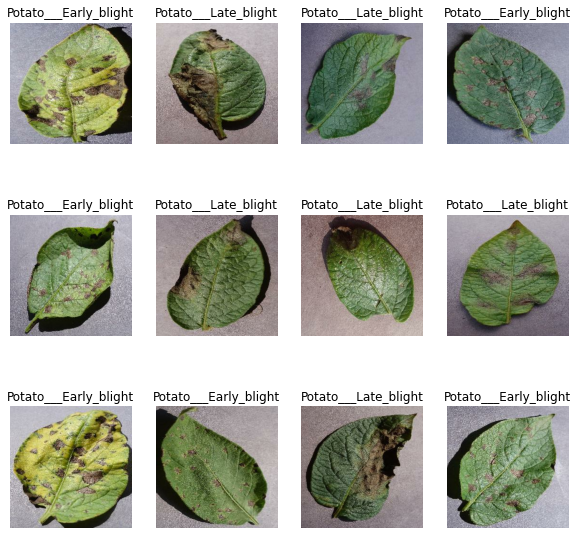

In [12]:
plt.figure(figsize=(10,10))
for img_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(img_batch[i].numpy().astype('uint8'))
    plt.title(class_names[label_batch[i]])
    plt.axis('off')


In [13]:
len(dataset)

68

In [14]:
# lets split dataset into train, validation and test in 70:15:15

train_ds = dataset.take(int(len(dataset)*0.7))

In [15]:
len(train_ds)

47

In [16]:
valid_ds = dataset.skip(len(train_ds)).take(int((len(dataset)-len(train_ds))*.5))

In [17]:
len(valid_ds)

10

In [18]:
test_ds = dataset.skip(len(train_ds)+len(valid_ds))

In [19]:
len(test_ds)

11

In [20]:
def get_dataset_partitions_tf(ds, train_sz=0.8, valid_sz=0.1, test_sz=0.1,
                           shuffle=True, shuffle_size=1000 ):
  ds_sz = len(ds)
  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=10)
  train_ds = ds.take(int(len(ds)*train_sz))
  tr_len = len(train_ds)
  val_ds = ds.skip(tr_len).take(int((ds_sz-tr_len)*.5))
  val_len = len(val_ds)
  test_ds = ds.skip(tr_len+val_len)

  return train_ds, val_ds, test_ds

In [21]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [22]:
len(train_ds)

54

In [23]:
len(val_ds)

7

In [24]:
len(test_ds)

7

In [25]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [26]:
resize_and_rescale = tf.keras.Sequential([
                  layers.experimental.preprocessing.Resizing(Img_Size,Img_Size),
                  layers.experimental.preprocessing.Rescaling(1./255)
])

In [27]:
data_agumentation = tf.keras.Sequential([
                  layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
                  layers.experimental.preprocessing.RandomRotation(0.2)
])

In [32]:
In_sz = (Batch_Size,Img_Size, Img_Size, Channels)
n_classes =3
model = models.Sequential([
              resize_and_rescale,
              data_agumentation,
              layers.Conv2D(32, (3,3), activation = 'relu', input_shape = In_sz),
              layers.MaxPooling2D((2,2)),
              layers.Conv2D(64, (3,3), activation = 'relu', input_shape = In_sz),
              layers.MaxPooling2D((2,2)),
              layers.Conv2D(64, (3,3), activation = 'relu', input_shape = In_sz),
              layers.MaxPooling2D((2,2)),
              layers.Conv2D(64, (3,3), activation = 'relu', input_shape = In_sz),
              layers.MaxPooling2D((2,2)),
              layers.Conv2D(64, (3,3), activation = 'relu', input_shape = In_sz),
              layers.MaxPooling2D((2,2)),
              layers.Conv2D(64, (3,3), activation = 'relu', input_shape = In_sz),
              layers.MaxPooling2D((2,2)),
              layers.Flatten(),
              layers.Dense(64, activation = 'relu'),
              layers.Dense(n_classes, activation =  'softmax')

])
model.build(input_shape =In_sz)

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [36]:
model.compile(
    optimizer = 'adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [44]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = Batch_Size,
    validation_data = val_ds,
    verbose = 1
)

Epoch 1/5
54/54 [==============================] - 193s 4s/step - loss: 0.8448 - accuracy: 0.5554 - val_loss: 0.7736 - val_accuracy: 0.6339
Epoch 2/5
54/54 [==============================] - 185s 3s/step - loss: 0.5684 - accuracy: 0.7358 - val_loss: 0.3921 - val_accuracy: 0.8348
Epoch 3/5
54/54 [==============================] - 187s 3s/step - loss: 0.4461 - accuracy: 0.8108 - val_loss: 0.3027 - val_accuracy: 0.8705
Epoch 4/5
54/54 [==============================] - 185s 3s/step - loss: 0.3247 - accuracy: 0.8682 - val_loss: 0.3019 - val_accuracy: 0.8750
Epoch 5/5
54/54 [==============================] - 188s 3s/step - loss: 0.2586 - accuracy: 0.8987 - val_loss: 0.2319 - val_accuracy: 0.9062


In [45]:
scores = model.evaluate(test_ds)

7/7 [==============================] - 16s 1s/step - loss: 0.1796 - accuracy: 0.9375


In [46]:
scores

[0.17961864173412323, 0.9375]

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

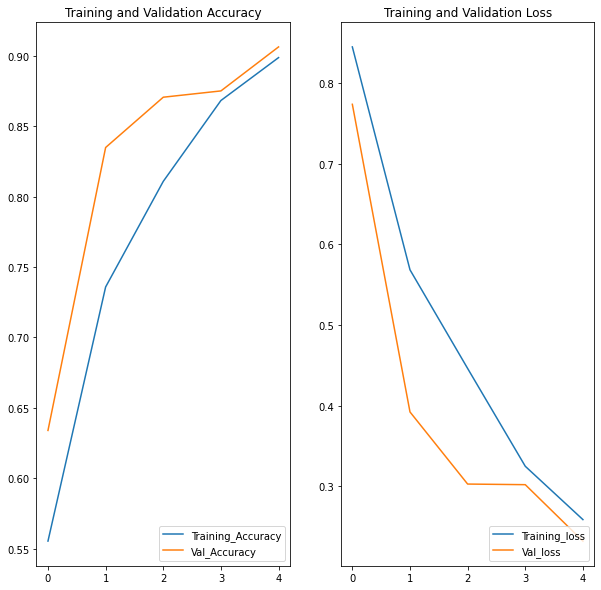

In [51]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label = 'Training_Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Val_Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label = 'Training_loss')
plt.plot(range(EPOCHS), val_loss, label = 'Val_loss')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Loss')
plt.show()